In [ ]:
!wget https://www.dropbox.com/sh/0mwmry1551vq4qr/AABcdnMtpohQ3keBOe5HoHEka?dl=0

--2020-08-29 14:25:31--  https://www.dropbox.com/sh/0mwmry1551vq4qr/AABcdnMtpohQ3keBOe5HoHEka?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.1, 2620:100:6023:1::a27d:4301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/0mwmry1551vq4qr/AABcdnMtpohQ3keBOe5HoHEka [following]
--2020-08-29 14:25:32--  https://www.dropbox.com/sh/raw/0mwmry1551vq4qr/AABcdnMtpohQ3keBOe5HoHEka
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbec738fc9a69b8f0c2fc54e79a.dl.dropboxusercontent.com/zip_download_get/Ahws9uBIaAVBOl7_8zp6IWaOGL1U6oVaMMrEO10vt4Lb1JQyvIUd_KVxqbvXdNTfvNTiTJyXIvTpjsw6hGgqE2q-wxWp7rmdc9GoPjDp49uUuQ [following]
--2020-08-29 14:25:32--  https://ucbec738fc9a69b8f0c2fc54e79a.dl.dropboxusercontent.com/zip_download_get/Ahws9uBIaAVBOl7_8zp6IWaOGL1U6oVaMMrEO10vt4Lb1JQyvIUd_KVxqbvXdNTfvNTiTJyXIvTpjsw6h

In [ ]:
!ls

'AABcdnMtpohQ3keBOe5HoHEka?dl=0'   sample_data


In [ ]:
!unzip AABcdnMtpohQ3keBOe5HoHEka?dl=0

Archive:  AABcdnMtpohQ3keBOe5HoHEka?dl=0
mapname:  conversion of  failed
 extracting: Dataset.zip             

1 archive had fatal errors.


In [ ]:
!unzip Dataset.zip


Archive:  Dataset.zip
   creating: Dataset/
   creating: Dataset/.ipynb_checkpoints/
   creating: Dataset/train/
   creating: Dataset/train/Covid/
  inflating: Dataset/train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: Dataset/train/Covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: Dataset/train/Covid/0a7faa2a.jpg  
  inflating: Dataset/train/Covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: Dataset/train/Covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: Dataset/train/Covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: Dataset/train/Covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: Dataset/train/Covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: Dataset/train/Covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: Dataset/train/Covid/1-s2.0-S1684118220300682-main.pdf-003-b2.png  
  inflating: Dataset/train/Covid/1-s2.0-S2214250920300834-gr1_lrg-b.png  
  inflating: Dataset/train/Covi

In [ ]:
Train_path = "Dataset/train"
Val_path = "Dataset/val"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import keras
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 54, 54, 64)       

In [ ]:
for ilayer, layer in enumerate(model.layers):
    print("{:3.0f} {:10}".format(ilayer, layer.name))

  0 conv2d_8  
  1 conv2d_9  
  2 max_pooling2d_6
  3 dropout_8 
  4 conv2d_10 
  5 max_pooling2d_7
  6 dropout_9 
  7 conv2d_11 
  8 max_pooling2d_8
  9 dropout_10
 10 flatten_2 
 11 dense_4   
 12 dropout_11
 13 dense_5   


In [ ]:
train_data_gen = image.ImageDataGenerator(rescale=1/255.0,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data_gen = image.ImageDataGenerator(rescale=1/255.0)

In [ ]:
train_generator = train_data_gen.flow_from_directory('Dataset/train',target_size=(224,224),batch_size=32,class_mode='binary')

Found 288 images belonging to 2 classes.


In [ ]:
val_generator = test_data_gen.flow_from_directory('Dataset/val',target_size=(224,224),batch_size=32,class_mode='binary')

Found 72 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(train_generator,steps_per_epoch=2,epochs=1,validation_data=val_generator,validation_steps=2)

2/2 [==============================] - 5s 2s/step - loss: 0.0937 - accuracy: 0.9688 - val_loss: 0.1915 - val_accuracy: 0.9531


In [ ]:
model.save("my_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.08793498575687408, 0.9756944179534912]

In [ ]:
model.evaluate(val_generator)

3/3 [==============================] - 1s 470ms/step - loss: 0.1716 - accuracy: 0.9583


[0.17164483666419983, 0.9583333134651184]

In [ ]:
!sudo pip install h5py

In [ ]:
model = keras.models.load_model("my_model")

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual=[]
y_pred = []

In [ ]:
for i in os.listdir('./Dataset/val/Normal/'):
  img = image.load_img('./Dataset/val/Normal/'+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_pred.append(p[0,0])
  y_actual.append(1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
for i in os.listdir('./Dataset/val/Covid/'):
  img = image.load_img('./Dataset/val/Covid/'+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_pred.append(p[0,0])
  y_actual.append(0)

In [ ]:
y_actual = np.array(y_actual)
y_pred = np.array(y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix 

In [ ]:
cm = confusion_matrix(y_actual,y_pred)

In [ ]:
import seaborn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


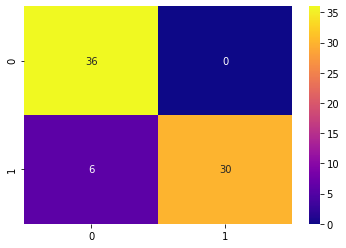

In [ ]:
seaborn.heatmap(cm,cmap='plasma',annot=True)

In [ ]:
def grad_cam(img):

  # Convert the image to array of type float32
  img = np.asarray(img, dtype = np.float32)

  # Reshape the image from (256,256,3) to (1,256,256,3)
  img = img.reshape(-1, 224, 224, 3)
  img_scaled = img / 255

  # Name of the average pooling layer and dense final (you can see these names in the model summary)
  classification_layers = ["flatten_2","dense_4", "dense_5"]

  # Last convolutional layer in the model
  final_conv = model.get_layer("conv2d_11")

  # Create a model with original model inputs and the last conv_layer as the output
  final_conv_model = keras.Model(model.inputs, final_conv.output)

  # Then we create the input for classification layer, which is the output of last conv layer
  # In our case, output produced by the conv layer is of the shape (1,3,3,2048) 
  # Since the classification input needs the features as input, we ignore the batch dimension
  new_input = final_conv.output.resize((-1,86528))

  classification_input = keras.Input(shape = new_input.shape)

  # We iterate through the classification layers, to get the final layer and then append 
  # the layer as the output layer to the classification model.
  temp = classification_input
  for layer in classification_layers:
      temp = model.get_layer(layer)(temp)
  classification_model = keras.Model(classification_input, temp)


  # We use gradient tape to monitor the 'final_conv_output' to retrive the gradients
  # corresponding to the predicted class
  with tf.GradientTape() as tape:
      # Pass the image through the base model and get the feature map 
      final_conv_output = final_conv_model(img_scaled)

      # Assign gradient tape to monitor the conv_output
      tape.watch(final_conv_output)
      
      # Pass the feature map through the classification model and use argmax to get the 
      # index of the predicted class and then use the index to get the value produced by final
      # layer for that class
      prediction = classification_model(final_conv_output)

      predicted_class = tf.argmax(prediction[0][0][0])

      predicted_class_value = prediction[:,:,:,predicted_class]
  
  # Get the gradient corresponding to the predicted class based on feature map.
  # which is of shape (1,3,3,2048)
  gradient = tape.gradient(predicted_class_value, final_conv_output)

  # Since we need the filter values (2048), we reduce the other dimensions, 
  # which would result in a shape of (2048,)
  gradient_channels = tf.reduce_mean(gradient, axis=(0, 1, 2))

  # We then convert the feature map produced by last conv layer(1,6,6,1536) to (6,6,1536)
  final_conv_output = final_conv_output.numpy()[0]

  gradient_channels = gradient_channels.numpy()

  # We multiply the filters in the feature map produced by final conv layer by the 
  # filter values that are used to get the predicted class. By doing this we inrease the
  # value of areas that helped in making the prediction and lower the vlaue of areas, that 
  # did not contribute towards the final prediction
  for i in range(gradient_channels.shape[-1]):
      final_conv_output[:, :, i] *= gradient_channels[i]

  # We take the mean accross the channels to get the feature map
  heatmap = np.mean(final_conv_output, axis=-1)

  # Normalizing the heat map between 0 and 1, to visualize it
  heatmap_normalized = np.maximum(heatmap, 0) / np.max(heatmap)

  # Rescaling and converting the type to int
  heatmap = np.uint8(255 * heatmap_normalized )

  # Create the colormap
  color_map = plt.cm.get_cmap('jet')

  # get only the rb features from the heatmap
  color_map = color_map(np.arange(256))[:, :3]
  heatmap = color_map[heatmap]

  # convert the array to image, resize the image and then convert to array
  heatmap = keras.preprocessing.image.array_to_img(heatmap)
  heatmap = heatmap.resize((256, 256))
  heatmap = np.asarray(heatmap, dtype = np.float32)

  # Add the heatmap on top of the original image
  final_img = heatmap * 0.4 + img[0]
  final_img = keras.preprocessing.image.array_to_img(final_img)

  return final_img, heatmap_normalized